In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,\
classification_report,roc_auc_score,roc_curve,precision_score,recall_score

In [8]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
data1 = load_breast_cancer()
df = data.frame
feature_name = data1.feature_names
target_name = data1.target_names

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
feature_name

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
target_name

array(['malignant', 'benign'], dtype='<U9')

In [12]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [13]:
X = df.drop('target',axis=1)
y = df['target']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 101,test_size=0.3)

In [24]:
model = DecisionTreeClassifier()
parameters = {
    "criterion":['gini','entropy','log_loss'],


    }

In [25]:
grid = GridSearchCV(model,param_grid=parameters,cv = 5,scoring ='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']},
             scoring='accuracy')

In [26]:
grid.best_params_

{'criterion': 'entropy'}

In [29]:
best_model = DecisionTreeClassifier(criterion="entropy")
skf = StratifiedKFold(n_splits=10,shuffle=True)
score = cross_val_score(
    best_model,x_train,y_train,cv=skf,scoring='accuracy'
)

In [32]:
print("Stratified KFold score: ",score)
print("mean of scores: ",score.mean())

Stratified KFold score:  [0.925      0.875      0.875      0.95       0.95       0.875
 0.925      0.925      0.97435897 0.92307692]
mean of scores:  0.9197435897435897


In [34]:
best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred)

0.935672514619883

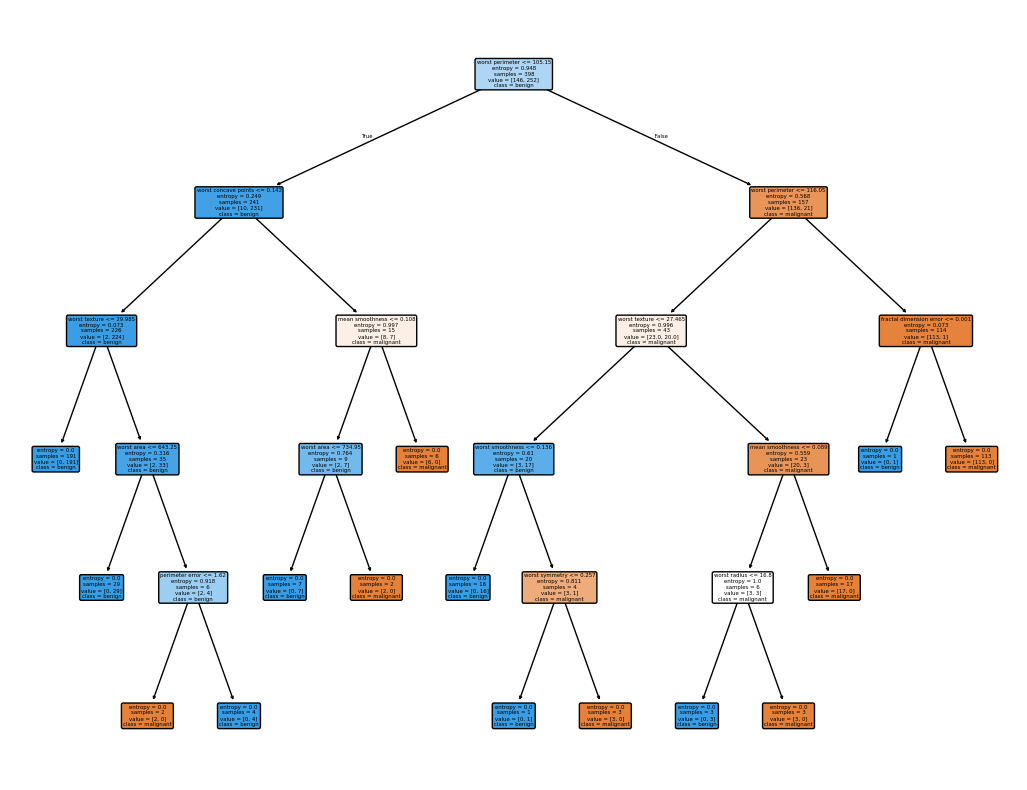

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize=(13,10))
plot_tree(best_model,feature_names=feature_name,class_names=target_name,filled=True,rounded=True)
plt.show()

In [42]:
from sklearn.tree import export_text
tree_rules = export_text(best_model,feature_names=feature_name)
print(tree_rules)

|--- worst perimeter <= 105.15
|   |--- worst concave points <= 0.14
|   |   |--- worst texture <= 29.98
|   |   |   |--- class: 1
|   |   |--- worst texture >  29.98
|   |   |   |--- worst area <= 643.25
|   |   |   |   |--- class: 1
|   |   |   |--- worst area >  643.25
|   |   |   |   |--- perimeter error <= 1.62
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- perimeter error >  1.62
|   |   |   |   |   |--- class: 1
|   |--- worst concave points >  0.14
|   |   |--- mean smoothness <= 0.11
|   |   |   |--- worst area <= 734.95
|   |   |   |   |--- class: 1
|   |   |   |--- worst area >  734.95
|   |   |   |   |--- class: 0
|   |   |--- mean smoothness >  0.11
|   |   |   |--- class: 0
|--- worst perimeter >  105.15
|   |--- worst perimeter <= 116.05
|   |   |--- worst texture <= 27.47
|   |   |   |--- worst smoothness <= 0.14
|   |   |   |   |--- class: 1
|   |   |   |--- worst smoothness >  0.14
|   |   |   |   |--- worst symmetry <= 0.26
|   |   |   |   |   |--- class: 1
|